Atlanta has the most damages. Having multiple entries in the top 10

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import wrangle as w
import explore as e
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
scaler= MinMaxScaler()

In [31]:
df= w.get_cws_data()

In [4]:
df.head(20)

,id,total_charges,amount_paid,open,charge_code,description,prop_id,charge_name,sStatus,rent,term,monthly_inc,GuarantorRequired,total_inc,Recommendation,age,risk_score,reason,bad_resident
0,3946,75.00,75.00,0,131,"Uncllctbl key, remote fees",136,"Uncllctbl key, remote fees",Current,1311,15,52500,False,666000,Accept,33,745,Insufficient period of Residence History,1
1,3962,13.66,13.66,0,112,Water 8/1/2021-9/1/2021,136,Utility-water charges,Current,1661,12,65000,False,889992,Accept with Conditions (Extra Deposit),27,758,No Credit Experience,0
2,4050,46.17,46.17,0,155,Damage charges - Clean,136,Damage charges,Current,1412,12,48000,False,576000,Accept with Conditions (Extra Deposit),33,666,Insufficient period of Residence History,1
3,4948,9.76,9.76,0,111,Sewer Charge,140,Utility-sewer charges,Current,1377,18,72000,False,0,A-Criminal History Meets Requirements,39,0,Meets All Property Requirements,0
4,5001,6.85,6.85,0,113,Sewer Base Charge,140,Utility-water flat base charges,Current,2199,13,0,True,54996,Accept with Conditions (Guarantor),23,752,NaN,0
5,5215,27.00,27.00,0,128,Trash service fee (05/2022),136,Trash service fee,Current,1569,12,0,False,85716,Accept,30,657,Meets All Property Requirements,0
6,5241,25.00,25.00,0,155,Damages- 1 load full of trash left out front t...,137,Damage charges,Current,1704,12,5528,False,66336,Accept,23,768,Meets All Property Requirements,1
7,5242,-4.25,-4.25,0,298,:Write Off Charge Ctrl#266779\r\nSewer Base Ch...,137,Uncllctbl Non Rent,Current,1676,15,3500,False,85200,Accept with Conditions (Extra Deposit),30,0,No Credit Experience,1
8,5246,-5.00,-5.00,0,192,:Write Off Charge Ctrl#28322\r\nAmenity fee (1...,140,Uncllctbl amenity fee,Current,1706,15,3600,False,98304,Accept,12,607,Insufficient period of Employment History,1
9,5250,-416.75,-416.75,0,105,:Write Off Charge Ctrl#1036499\r\nRent - pro r...,137,Uncllctbl rent,Current,1696,12,9895,False,168780,Accept,29,668,Insufficient period of Employment History,1


In [5]:
train, validate, test, X_train, y_train, X_val, y_val, X_test, y_test = w.train_vailidate_test_split(df, 'bad_resident', 'bad_resident')

In [6]:
def states(val):
    '''
    This funciton takes in a column of values and uses a previously established property key to 
    convert each property id into the name of the state in which the property resides
    '''
    if val in range(53,116) or val in range(152,159) or val in [198,218,229,252,440,441,442,458]:
        return 'Texas'
    elif val in range(116,124) or val in [159, 444]:
        return 'North Carolina'
    elif val in range(125,131) or val in [164,183,212,213,217, 253]:
        return 'Colorado'
    elif val in range(142,147) or val in [216]:
        return 'Arizona'
    elif val == 131:
        return 'California'
    elif val in range(132,142) or val in [385,443,459]:
        return 'Georgia'
    elif val in [277,280]:
        return 'Tennessee'
    elif val in range(147,152) or val in [160,161,162,163]:
        return 'Washington'

In [7]:
train.prop_id = train.prop_id.apply(states)

In [465]:
def get_common(df1):
    
    '''
    This functions filters out the negative charge codes, then gets the top six of those codes.
    It then returns a plot to show the results. 
    '''
    
    # negative charge codes
    cc = [96, 105, 106, 115, 127, 131, 137, 138,142, 148, 154,
                155, 156, 163, 166, 169, 183, 189, 192, 229, 231, 233,
                245, 246, 247, 248, 249,250, 251, 253, 268, 298]
    
    
    # top six negative charge codes
    six= [298, 155, 105, 154, 156, 131]
    
    order= [298, 105, 155, 154, 156, 131]
    
    # create new df using negative charge codes
    bad_df= df1[df1['charge_code'].isin(cc)]
    
    # create new df using the top six negative charge codes
    six_df= bad_df[bad_df['charge_code'].isin(six)]
    
    #plotting the results of the function
    color= ['red', 'grey', 'grey', 'grey', 'grey', 'grey',]
    ax = sns.countplot(
                     data= six_df , x= 'charge_code', palette = color,
                     order= order, edgecolor = 'black', linewidth= 3.8)
    
    # Set xlabel
    plt.xlabel('Total Count')
    
    # Set ylabel
    plt.ylabel('Charge Code')
    
    # Set plot title
    plt.title('Total Charge Code Count')
    
    # set font scale
    sns.set(font_scale= 4.5)

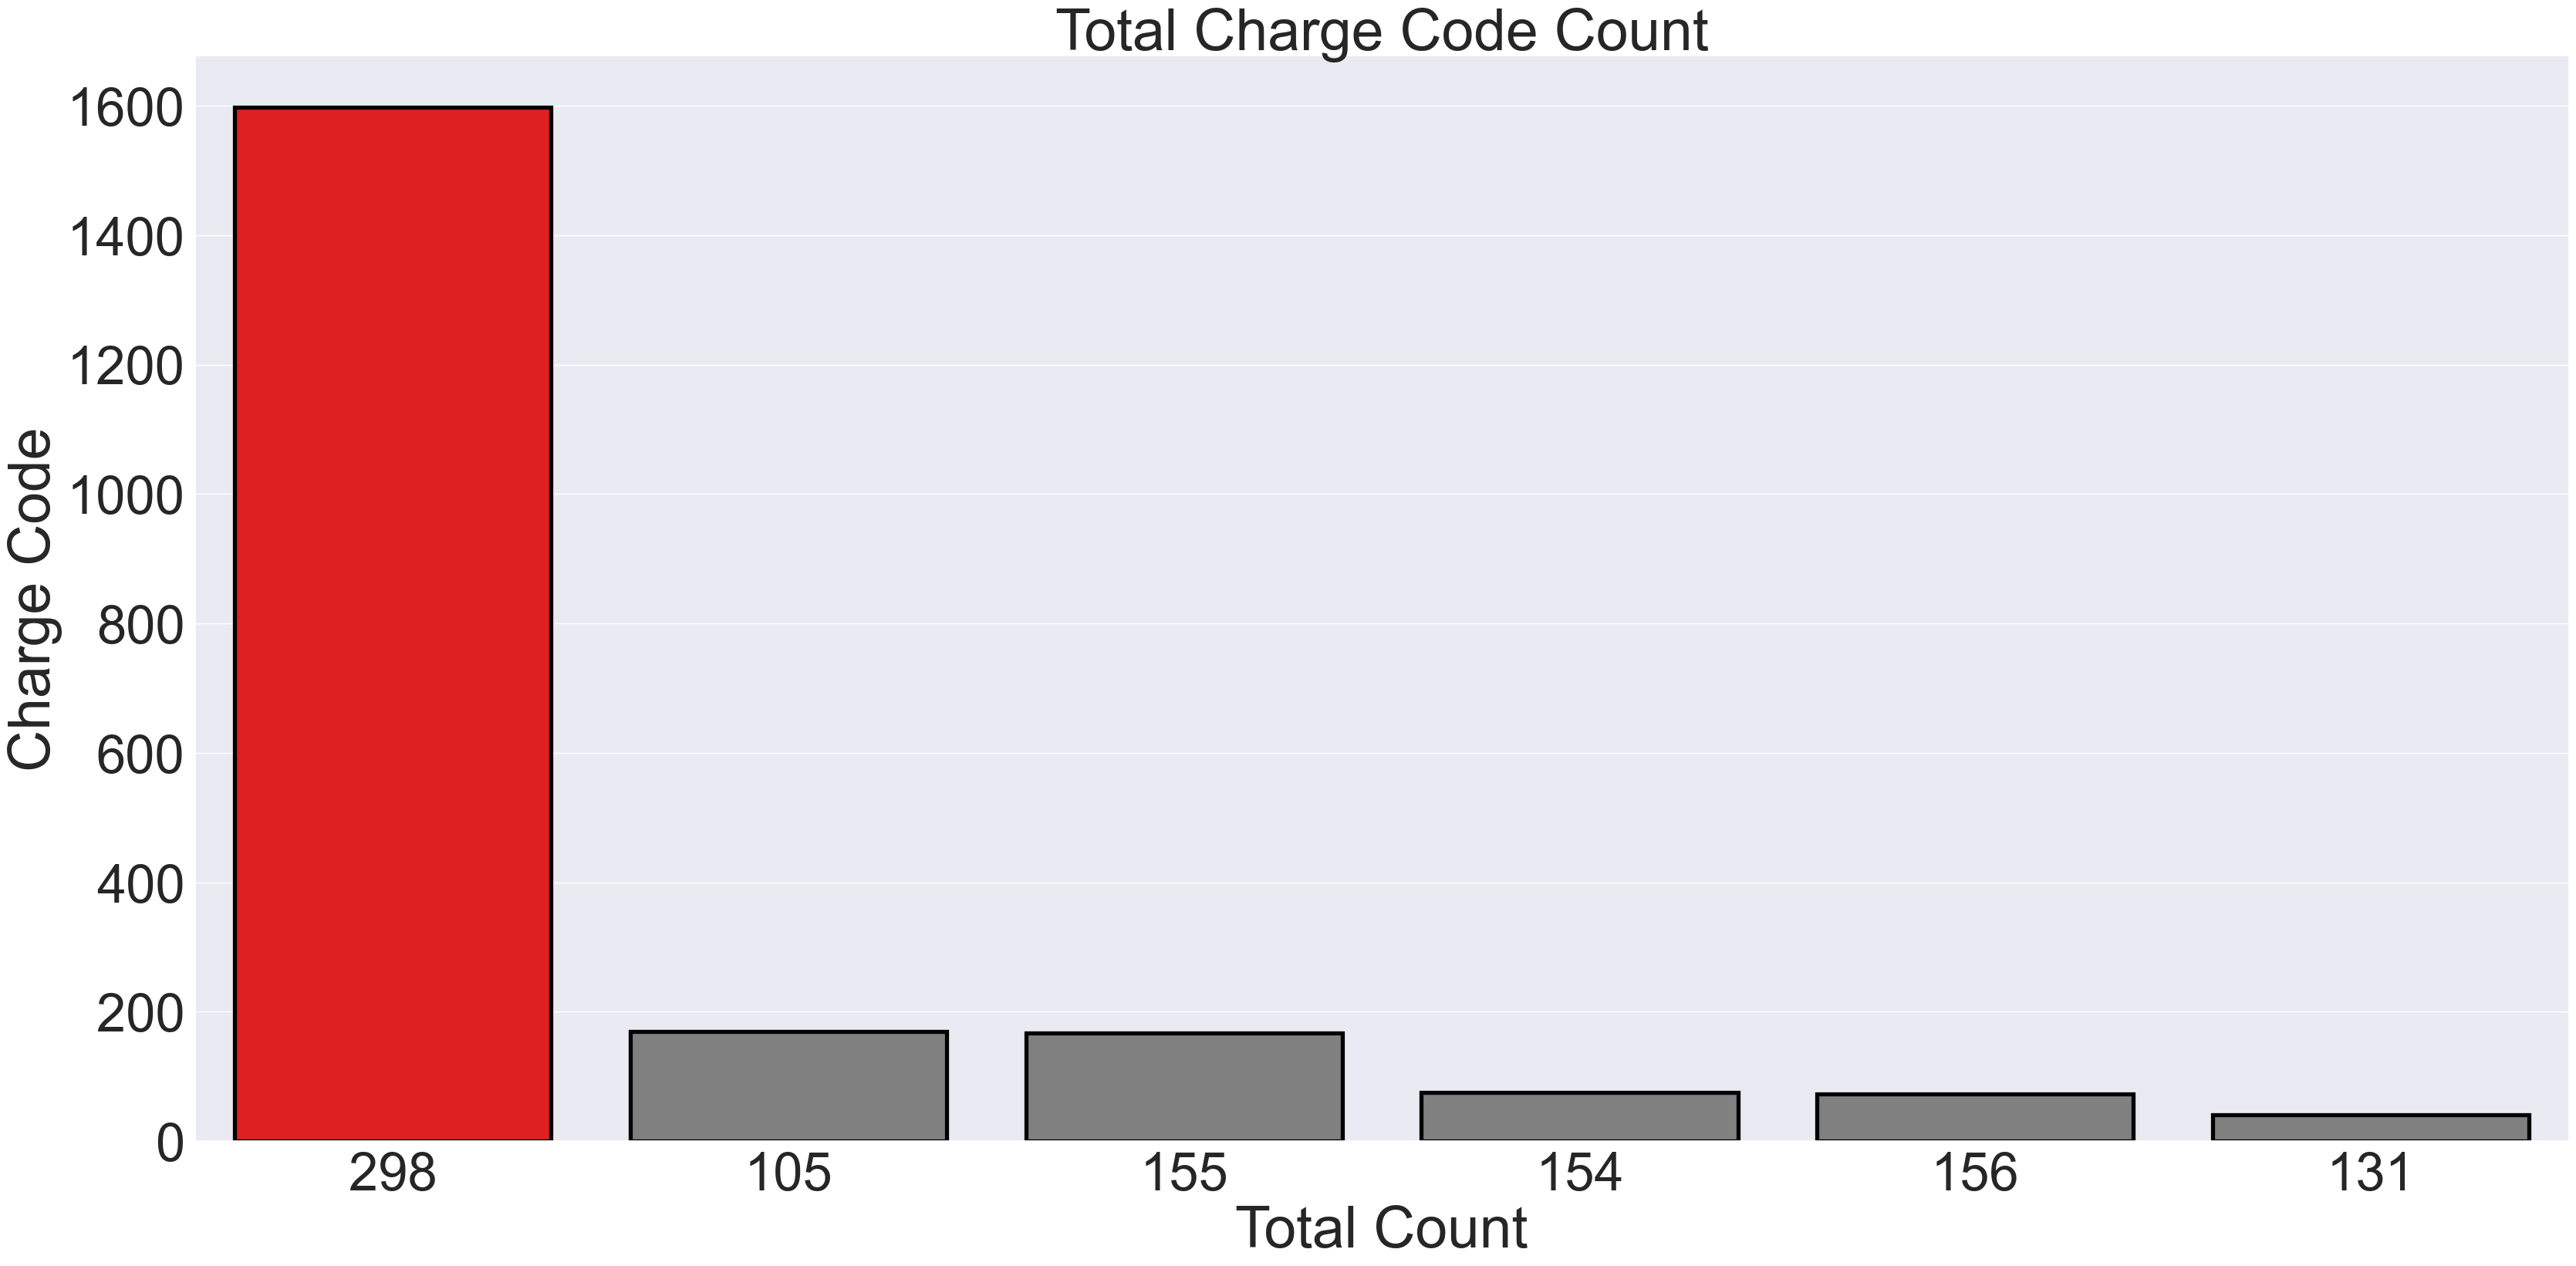

In [466]:
get_common(df1)

Takeaways:

Here we can see that Charge Code `298` is the most common, by a huge margine. 

In [274]:
def bad_properties(train):
    
    '''
    This function returns a dataframe that only contains residents with
    negative charge codes.
    '''
    
    # negative charge codes
    cc = [96, 105, 106, 115, 127, 131, 137, 138,142, 148, 154,
                155, 156, 163, 166, 169, 183, 189, 192, 229, 231, 233,
                245, 246, 247, 248, 249,250, 251, 253, 268, 298]
    
    # most common negative charge codes
    six= [298, 105, 155, 154, 156, 131]
    
    # filters our the bad properties
    bad_properties= train[train['charge_code'].isin(cc)]
    
    # returning the most 10 most common negative charge codes 
    df3= bad_properties.groupby('prop_id')['charge_code'].count().nlargest(10)
    
    
    # creates a dataframe of the results 
    df3= pd.DataFrame({'most_common': df3})
    
    # rest the index of the dataframe
    df3= df3.reset_index()
    
    # return the dataframe
    return df3

In [276]:
df3= bad_properties(train)

In [634]:
def plot_bad_properties(df3):
    
    '''
    This function plots which property location has the highest count 
    of charge codes.
    '''
    
    # set the palette order 
    color= ['red', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']
    fig = plt.figure()
    
    # create the graph
    ax= sns.barplot(data= df3, x= 'prop_id', y= 'most_common', palette= color, ec= 'black' , linewidth= 1.3)
    
    # set the figure size
    sns.set(rc={'figure.figsize':(8,5)})
    
    # set the font scale
    sns.set(font_scale= 1.3)
    
    # set xlabel
    plt.xlabel('Property Location')
    
    # set ylabel
    plt.ylabel('Charge Code Count')
    
    # set the title
    plt.title('Properties With The Most Charge Codes')
    
    # adds the count number to the top of the bars
    for i in ax.containers:
            ax.bar_label(i,)

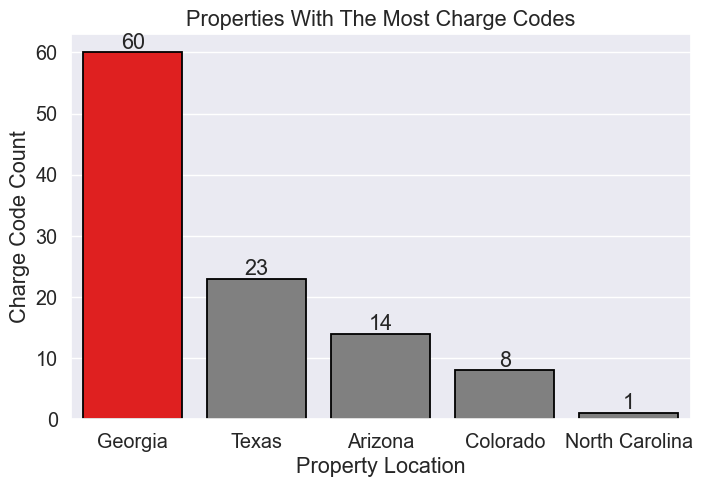

In [636]:
plot_bad_properties(df3)

In [579]:
bad_df= df1[df1['charge_code'].isin(cc)]

In [17]:
six= [298, 105, 155, 154, 156, 131]

In [18]:
six_df= bad_df[bad_df['charge_code'].isin(six)]

In [124]:
bad_df2= train[train['charge_code'].isin(cc)]

In [167]:
bad_df.groupby('property_id')['charge_code'].count().nlargest(10)

property_id
136    736
137    629
216    215
140    105
67      51
73      50
135     48
70      36
142     25
57      24
Name: charge_code, dtype: int64

In [132]:
bad_prop= [136, 137, 141, 138, 216, 139, 142, 67, 135, 60]
bad_prop_df= bad_df2[bad_df2['prop_id'].isin(bad_prop)]

In [163]:
bad_prop= [136, 137, 141, 138, 216, 139, 142, 67, 135, 60]
prop_group= bad_df2[bad_df2['prop_id'].isin(bad_prop)]

In [165]:
prop_group.bad_resident.mean()

1.0

In [630]:
def risk_score(train): 
    
    """
    This function shows how many bad residetns are in each range of risk
    score.
    """
    
    # set the color palette order
    color= ['grey', 'grey', 'grey', 'red', 'red']
    
    # Creating custom bins with 100 range and binning both total train pop and only bad train pop
    bins = [300,400,500,600,700,800,900]
    risk_bin = pd.cut(train['risk_score'], bins = bins)
    bad_risk = pd.cut(train[train.bad_resident == 1].risk_score, bins = bins)
    
    # creating the graph 
    ax= sns.countplot(x = bad_risk, palette= color, ec= 'black')
    
    # set xlabel
    plt.xlabel('Risk Score Range')
    
    # set ylabel
    plt.ylabel('Total Count')
    
    # set graph title
    plt.title('Which Range of Risk Score Has The Most Bad Residents')
    
    # set the font scale for the graph
    sns.set(font_scale= 1.5)
    
    # adds the count number to the top of the bars
    for i in ax.containers:
            ax.bar_label(i,)
    return plt.show()
    


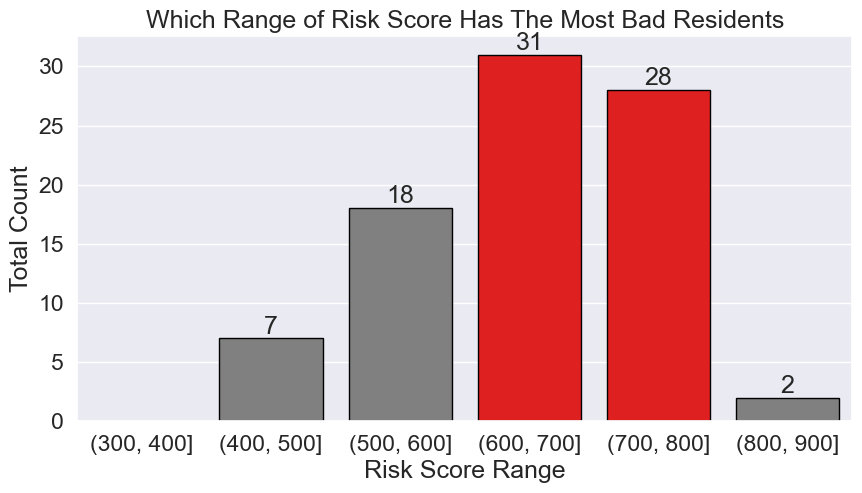

In [631]:
risk_score(train)

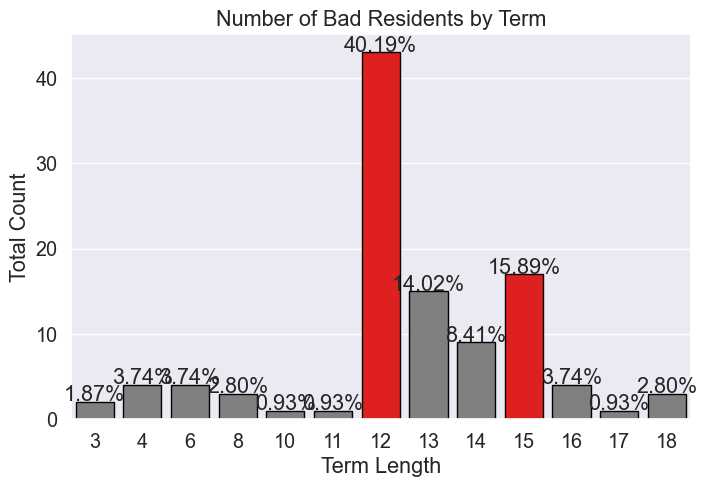

In [647]:
countplot_n(train, 'term', color, bad = True)

In [78]:
def get_common(train):
    
    '''
    This functions filters out the negative charge codes, then gets the top six of those codes.
    It then returns a plot to show the results. 
    '''
    
    # negative charge codes
    cc = [96, 105, 106, 115, 127, 131, 137, 138,142, 148, 154,
                155, 156, 163, 166, 169, 183, 189, 192, 229, 231, 233,
                245, 246, 247, 248, 249,250, 251, 253, 268, 298]
    
    
    # top six negative charge codes
    six= [298, 105, 155, 154, 156, 131]
    
    # create new df using negative charge codes
    bad_df= train[train['charge_code'].isin(cc)]
    
    # create new df using the top six negative charge codes
    six_df= bad_df[bad_df['charge_code'].isin(six)]
    
    #plotting the results of the function
    color= ['grey', 'grey', 'grey', 'grey', 'grey','red']
    bar = sns.countplot(data= six_df , x= 'charge_code', color = 'grey', ec= 'black')
    patch_h = [patch.get_height() for patch in bar.patches]   
    idx_tallest = np.argmax(patch_h)   
    bar.patches[idx_tallest].set_facecolor('seagreen')
    plt.title('Most Common Charge Codes')
    plt.xlabel('Charge')
    plt.ylabel('Count')
    for i in bar.containers:
            bar.bar_label(i,)
            
    return plt.show()        
          
def bad_properties(train):
    
    '''
    This function returns a dataframe that only contains residents with
    negative charge codes.
    '''
    
    # negative charge codes
    cc = [96, 105, 106, 115, 127, 131, 137, 138,142, 148, 154,
                155, 156, 163, 166, 169, 183, 189, 192, 229, 231, 233,
                245, 246, 247, 248, 249,250, 251, 253, 268, 298]
    
    # most common negative charge codes
    six= [298, 105, 155, 154, 156, 131]
    
    # filters our the bad properties
    bad_properties= train[train['charge_code'].isin(cc)]
    
    # returning the most 10 most common negative charge codes 
    df3= bad_properties.groupby('prop_id')['charge_code'].count().nlargest(10)
    
    
    # creates a dataframe of the results 
    df3= pd.DataFrame({'most_common': df3})
    
    # rest the index of the dataframe
    df3= df3.reset_index()
    
    # return the dataframe
    return df3
    
    
def plot_bad_properties(train):
    
    '''
    This function returns a visual of the states with the highest
    amount of charge codes.
    '''
    
    # setting the palette order 
    cl= ['red', 'grey', 'grey', 'grey', 'grey']
    
    # returing the resulting dataframe from the `bad_properties` function
    df = bad_properties(train)
    values = np.array(train.prop_id)
    fig = plt.figure()
    
    # creating the graph
    bar = sns.barplot(data= df, x= 'prop_id', y= 'most_common', palette= cl,  errwidth=0, ec= 'black')
    patch_h = [patch.get_height() for patch in bar.patches]   
    idx_tallest = np.argmax(patch_h)   
    
    # setting the xlabel
    plt.xlabel('Property ID')
    
    # setting the ylabel
    plt.ylabel('Charge Code Count')
    
    # setting the title
    plt.title('Properties With The Most Damage Codes')
    
    # adding the total count number on the top of the bars
    for i in bar.containers:
            bar.bar_label(i,)
    
    # returning the graph
    return plt.show()
            
def risk_score(train): 
    
    """
    This function shows how many bad residetns are in each range of risk
    score.
    """
    one= 1
    # set the color palette order
    color= ['grey', 'grey', 'grey', 'red', 'red']
    
    # set the font scale
    sns.set(font_scale= one)
    
    # Creating custom bins with 100 range and binning both total train pop and only bad train pop
    bins = [300,400,500,600,700,800,900]
    risk_bin = pd.cut(train['risk_score'], bins = bins)
    bad_risk = pd.cut(train[train.bad_resident == 1].risk_score, bins = bins)
    
    # creating the graph 
    ax= sns.countplot(x = bad_risk, palette= color, ec= 'black')
    
    # set xlabel
    plt.xlabel('Risk Score Range')
    
    # set ylabel
    plt.ylabel('Total Count')
    
    # set graph title
    plt.title('Which Range of Risk Score Has The Most Bad Residents')
    
    # set the font scale for the graph
    sns.set(font_scale= 1.5)
    
    # adds the count number to the top of the bars
    for i in ax.containers:
            ax.bar_label(i,)
    return plt.show()

In [80]:
def countplot_n(data, column, bad=False):
    
    """
    This function retruns the percentage of bad residents 
    per lease term length.
    """
    
    color= ['grey', 'grey', 'grey', 'grey', 'red', 'red', 'grey', 'red', 'grey', 'grey']
    
     # set the font scale
    sns.set(font_scale= 1)
    
    # if statement for which graph will be returned 
    if bad:
        bad_resid = data[data.bad_resident == 1]
        bar= sns.countplot(x= column, data=bad_resid, palette= color, ec='black')
        plt.title(f'Number of Bad Residents by {column.capitalize()}')
        plt.xlabel(f'{column.capitalize()} Length')
        plt.ylabel('Total Count')
        for p in bar.patches:
            height= p.get_height() / len(bad_resid) * 100
            bar.annotate(f"{height:.2f}%", (p.get_x() + p.get_width() / 2,
                                            p.get_height()), ha='center', va='center',
                                            xytext=(0, 5), textcoords='offset points')
        plt.show()
    
    else:
        bar = sns.countplot(x=column, data=data, palette= color, ec= 'black')
        plt.title(f'Number of Bad Residents by {column.capitalize()}')
        plt.xlabel(f'{column.capitalize()} Length')
        plt.ylabel('Total Count')
        for p in bar.patches:
            height = p.get_height() / len(data) * 100
            bar.annotate(f"{height:.2f}%", (p.get_x() + p.get_width() / 2, p.get_height()),
                         ha= 'center', va= 'center', xytext= (0, 5), textcoords= 'offset points')
        plt.show()
    

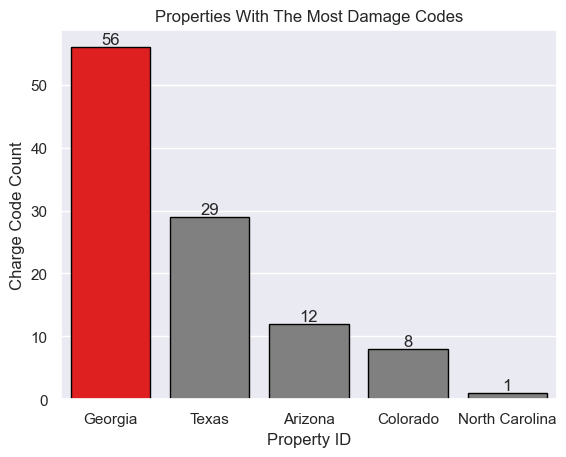

In [84]:
e.plot_bad_properties(train)

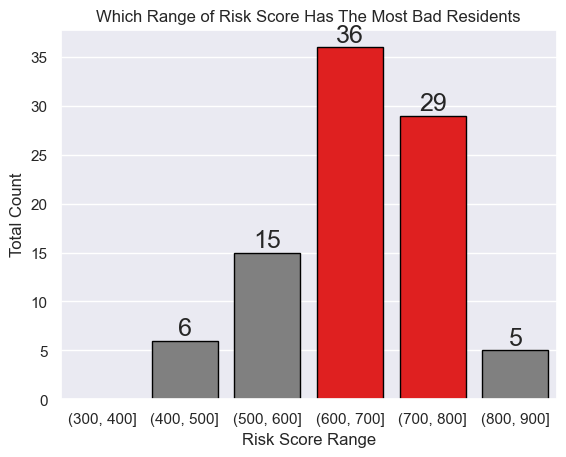

In [85]:
e.risk_score(train)

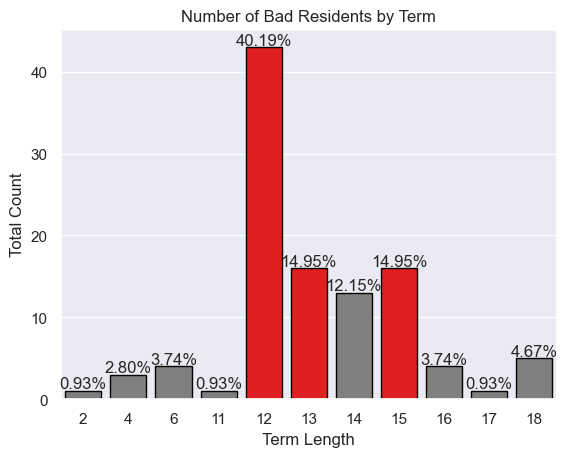

In [86]:
e.countplot_n(train, 'term', bad= True)